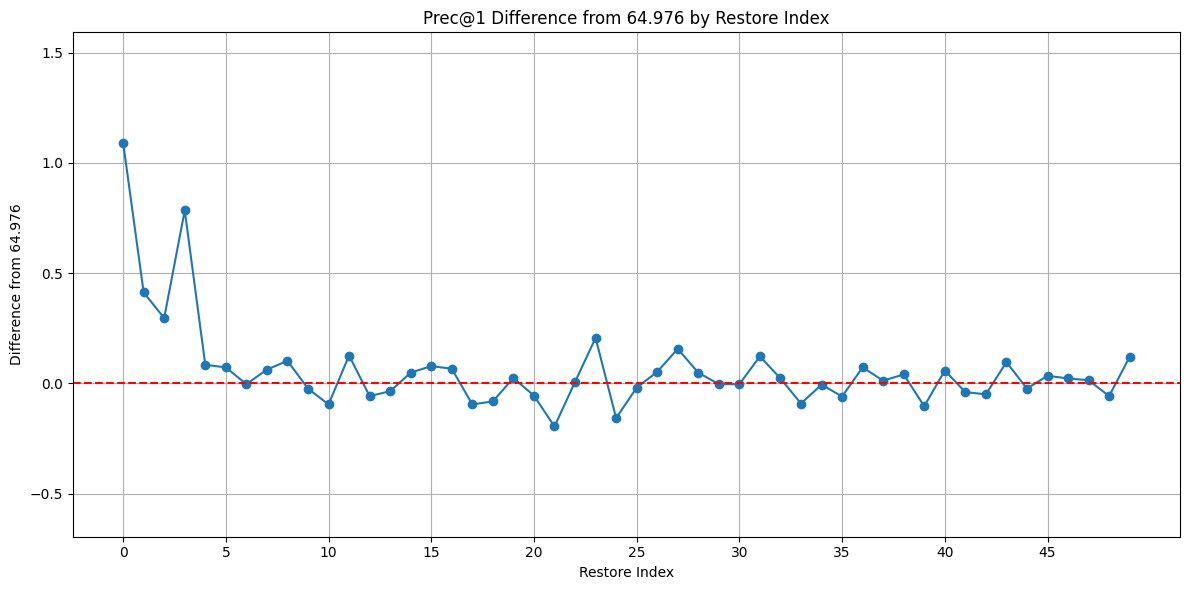

In [1]:
import matplotlib.pyplot as plt
import re

# 데이터 파싱
data = """
  
 * Restore Index: 0, Prec@1 66.216 Prec@5 87.610 Time 60.349
 * Restore Index: 1, Prec@1 65.536 Prec@5 86.860 Time 60.224
 * Restore Index: 2, Prec@1 65.420 Prec@5 86.826 Time 60.064
 * Restore Index: 3, Prec@1 65.908 Prec@5 87.216 Time 59.845
 * Restore Index: 4, Prec@1 65.208 Prec@5 86.874 Time 59.630
 * Restore Index: 5, Prec@1 65.196 Prec@5 86.712 Time 59.485
 * Restore Index: 6, Prec@1 65.120 Prec@5 86.664 Time 59.269
 * Restore Index: 7, Prec@1 65.186 Prec@5 86.776 Time 59.013
 * Restore Index: 8, Prec@1 65.226 Prec@5 86.678 Time 58.778
 * Restore Index: 9, Prec@1 65.100 Prec@5 86.698 Time 58.874
 * Restore Index: 10, Prec@1 65.028 Prec@5 86.638 Time 58.567
 * Restore Index: 11, Prec@1 65.250 Prec@5 86.706 Time 58.334
 * Restore Index: 12, Prec@1 65.066 Prec@5 86.744 Time 58.203
 * Restore Index: 13, Prec@1 65.088 Prec@5 86.696 Time 57.844
 * Restore Index: 14, Prec@1 65.172 Prec@5 86.650 Time 57.795
 * Restore Index: 15, Prec@1 65.202 Prec@5 86.844 Time 57.648
 * Restore Index: 16, Prec@1 65.190 Prec@5 86.758 Time 57.554
 * Restore Index: 17, Prec@1 65.028 Prec@5 86.708 Time 57.311
 * Restore Index: 18, Prec@1 65.042 Prec@5 86.600 Time 56.962
 * Restore Index: 19, Prec@1 65.148 Prec@5 86.802 Time 56.858
 * Restore Index: 20, Prec@1 65.068 Prec@5 86.692 Time 56.620
 * Restore Index: 21, Prec@1 64.928 Prec@5 86.710 Time 56.505
 * Restore Index: 22, Prec@1 65.130 Prec@5 86.738 Time 56.541
 * Restore Index: 23, Prec@1 65.330 Prec@5 86.876 Time 56.044
 * Restore Index: 24, Prec@1 64.966 Prec@5 86.668 Time 55.983
 * Restore Index: 25, Prec@1 65.104 Prec@5 86.664 Time 55.921
 * Restore Index: 26, Prec@1 65.176 Prec@5 86.648 Time 54.999
 * Restore Index: 27, Prec@1 65.280 Prec@5 86.750 Time 55.406
 * Restore Index: 28, Prec@1 65.172 Prec@5 86.718 Time 55.282
 * Restore Index: 29, Prec@1 65.120 Prec@5 86.754 Time 55.233
 * Restore Index: 30, Prec@1 65.120 Prec@5 86.660 Time 55.100
 * Restore Index: 31, Prec@1 65.246 Prec@5 86.736 Time 54.688
 * Restore Index: 32, Prec@1 65.146 Prec@5 86.744 Time 54.610
 * Restore Index: 33, Prec@1 65.032 Prec@5 86.736 Time 54.436
 * Restore Index: 34, Prec@1 65.118 Prec@5 86.710 Time 54.325
 * Restore Index: 35, Prec@1 65.064 Prec@5 86.708 Time 54.057
 * Restore Index: 36, Prec@1 65.196 Prec@5 86.642 Time 53.748
 * Restore Index: 37, Prec@1 65.136 Prec@5 86.694 Time 53.485
 * Restore Index: 38, Prec@1 65.164 Prec@5 86.628 Time 53.555
 * Restore Index: 39, Prec@1 65.020 Prec@5 86.682 Time 53.427
 * Restore Index: 40, Prec@1 65.182 Prec@5 86.718 Time 53.073
 * Restore Index: 41, Prec@1 65.084 Prec@5 86.706 Time 52.579
 * Restore Index: 42, Prec@1 65.074 Prec@5 86.676 Time 52.749
 * Restore Index: 43, Prec@1 65.220 Prec@5 86.780 Time 52.374
 * Restore Index: 44, Prec@1 65.100 Prec@5 86.728 Time 52.452
 * Restore Index: 45, Prec@1 65.158 Prec@5 86.720 Time 52.110
 * Restore Index: 46, Prec@1 65.146 Prec@5 86.712 Time 51.669
 * Restore Index: 47, Prec@1 65.138 Prec@5 86.712 Time 51.902
 * Restore Index: 48, Prec@1 65.066 Prec@5 86.684 Time 51.570
 * Restore Index: 49, Prec@1 65.244 Prec@5 86.834 Time 51.652


"""

# 정규 표현식을 사용하여 인덱스와 Prec@1 값 추출
pattern = r'Restore Index: (\d+), Prec@1 (\d+\.\d+)'
matches = re.findall(pattern, data)

# 데이터 준비
indices = [int(match[0]) for match in matches]
prec_values = [float(match[1]) for match in matches]

# 64.976을 기준으로 증감 계산
baseline = 65.124
differences = [val - baseline for val in prec_values]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(indices, differences, marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Restore Index')
plt.ylabel('Difference from 64.976')
plt.title('Prec@1 Difference from 64.976 by Restore Index')
plt.grid(True)

# x축 눈금 설정
plt.xticks(range(0, max(indices)+1, 5))

# y축 범위 설정
plt.ylim(min(differences)-0.5, max(differences)+0.5)

plt.tight_layout()
plt.show()

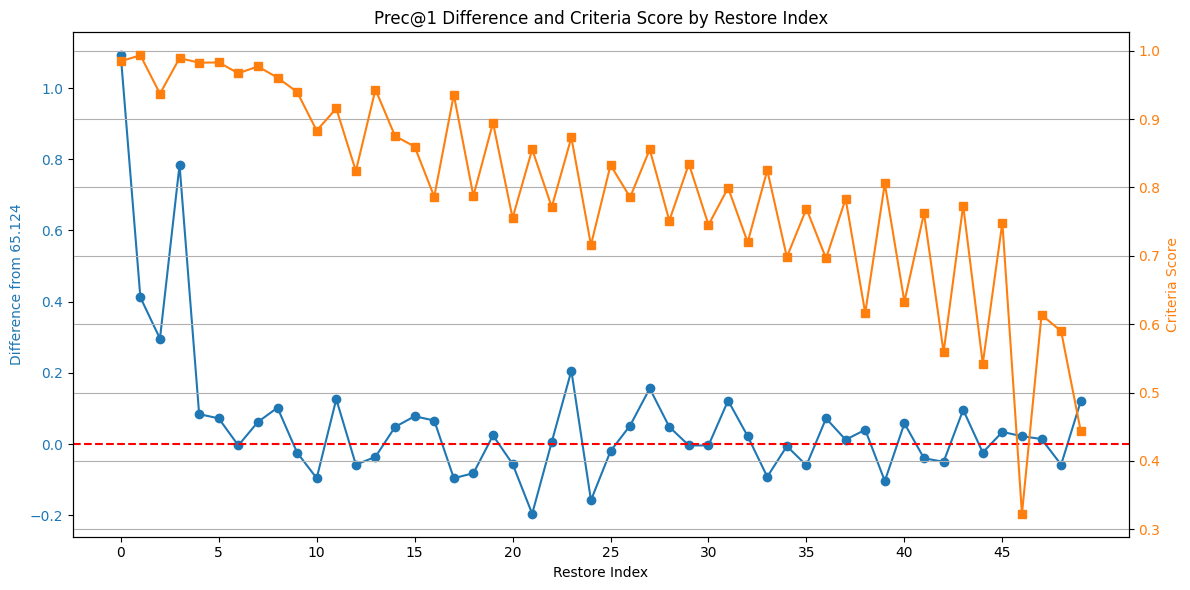

Correlation between Prec@1 difference and Criteria Score: 0.3258


In [2]:
import matplotlib.pyplot as plt
import re
import numpy as np

# 데이터 파싱 (기존 코드와 동일)
data = """
 * Restore Index: 0, Prec@1 66.216 Prec@5 87.610 Time 60.349
 * Restore Index: 1, Prec@1 65.536 Prec@5 86.860 Time 60.224
 * Restore Index: 2, Prec@1 65.420 Prec@5 86.826 Time 60.064
 * Restore Index: 3, Prec@1 65.908 Prec@5 87.216 Time 59.845
 * Restore Index: 4, Prec@1 65.208 Prec@5 86.874 Time 59.630
 * Restore Index: 5, Prec@1 65.196 Prec@5 86.712 Time 59.485
 * Restore Index: 6, Prec@1 65.120 Prec@5 86.664 Time 59.269
 * Restore Index: 7, Prec@1 65.186 Prec@5 86.776 Time 59.013
 * Restore Index: 8, Prec@1 65.226 Prec@5 86.678 Time 58.778
 * Restore Index: 9, Prec@1 65.100 Prec@5 86.698 Time 58.874
 * Restore Index: 10, Prec@1 65.028 Prec@5 86.638 Time 58.567
 * Restore Index: 11, Prec@1 65.250 Prec@5 86.706 Time 58.334
 * Restore Index: 12, Prec@1 65.066 Prec@5 86.744 Time 58.203
 * Restore Index: 13, Prec@1 65.088 Prec@5 86.696 Time 57.844
 * Restore Index: 14, Prec@1 65.172 Prec@5 86.650 Time 57.795
 * Restore Index: 15, Prec@1 65.202 Prec@5 86.844 Time 57.648
 * Restore Index: 16, Prec@1 65.190 Prec@5 86.758 Time 57.554
 * Restore Index: 17, Prec@1 65.028 Prec@5 86.708 Time 57.311
 * Restore Index: 18, Prec@1 65.042 Prec@5 86.600 Time 56.962
 * Restore Index: 19, Prec@1 65.148 Prec@5 86.802 Time 56.858
 * Restore Index: 20, Prec@1 65.068 Prec@5 86.692 Time 56.620
 * Restore Index: 21, Prec@1 64.928 Prec@5 86.710 Time 56.505
 * Restore Index: 22, Prec@1 65.130 Prec@5 86.738 Time 56.541
 * Restore Index: 23, Prec@1 65.330 Prec@5 86.876 Time 56.044
 * Restore Index: 24, Prec@1 64.966 Prec@5 86.668 Time 55.983
 * Restore Index: 25, Prec@1 65.104 Prec@5 86.664 Time 55.921
 * Restore Index: 26, Prec@1 65.176 Prec@5 86.648 Time 54.999
 * Restore Index: 27, Prec@1 65.280 Prec@5 86.750 Time 55.406
 * Restore Index: 28, Prec@1 65.172 Prec@5 86.718 Time 55.282
 * Restore Index: 29, Prec@1 65.120 Prec@5 86.754 Time 55.233
 * Restore Index: 30, Prec@1 65.120 Prec@5 86.660 Time 55.100
 * Restore Index: 31, Prec@1 65.246 Prec@5 86.736 Time 54.688
 * Restore Index: 32, Prec@1 65.146 Prec@5 86.744 Time 54.610
 * Restore Index: 33, Prec@1 65.032 Prec@5 86.736 Time 54.436
 * Restore Index: 34, Prec@1 65.118 Prec@5 86.710 Time 54.325
 * Restore Index: 35, Prec@1 65.064 Prec@5 86.708 Time 54.057
 * Restore Index: 36, Prec@1 65.196 Prec@5 86.642 Time 53.748
 * Restore Index: 37, Prec@1 65.136 Prec@5 86.694 Time 53.485
 * Restore Index: 38, Prec@1 65.164 Prec@5 86.628 Time 53.555
 * Restore Index: 39, Prec@1 65.020 Prec@5 86.682 Time 53.427
 * Restore Index: 40, Prec@1 65.182 Prec@5 86.718 Time 53.073
 * Restore Index: 41, Prec@1 65.084 Prec@5 86.706 Time 52.579
 * Restore Index: 42, Prec@1 65.074 Prec@5 86.676 Time 52.749
 * Restore Index: 43, Prec@1 65.220 Prec@5 86.780 Time 52.374
 * Restore Index: 44, Prec@1 65.100 Prec@5 86.728 Time 52.452
 * Restore Index: 45, Prec@1 65.158 Prec@5 86.720 Time 52.110
 * Restore Index: 46, Prec@1 65.146 Prec@5 86.712 Time 51.669
 * Restore Index: 47, Prec@1 65.138 Prec@5 86.712 Time 51.902
 * Restore Index: 48, Prec@1 65.066 Prec@5 86.684 Time 51.570
 * Restore Index: 49, Prec@1 65.244 Prec@5 86.834 Time 51.652
"""

# 정규 표현식을 사용하여 인덱스와 Prec@1 값 추출 (기존 코드와 동일)
pattern = r'Restore Index: (\d+), Prec@1 (\d+\.\d+)'
matches = re.findall(pattern, data)

# 데이터 준비 (기존 코드와 동일)
indices = [int(match[0]) for match in matches]
prec_values = [float(match[1]) for match in matches]

# 64.976을 기준으로 증감 계산 (기존 코드와 동일)
baseline = 65.124
differences = [val - baseline for val in prec_values]

# 새로운 criteria score 데이터
criteria_scores = [0.9844448, 0.9932241, 0.93696433, 0.9890642, 0.98236245, 0.98273927,
                   0.9669165, 0.97682315, 0.96053445, 0.93956995, 0.883112, 0.9153894,
                   0.82392144, 0.94314486, 0.87513494, 0.8596895, 0.78642637, 0.9355694,
                   0.78753734, 0.8946206, 0.75526136, 0.8556227, 0.7713002, 0.8730264,
                   0.7159015, 0.8325918, 0.7855737, 0.85561025, 0.7514658, 0.834453,
                   0.7451548, 0.79941905, 0.7197552, 0.82510316, 0.6981765, 0.76884013,
                   0.6962489, 0.783298, 0.6163095, 0.80576235, 0.63277966, 0.76214015,
                   0.5590432, 0.7734749, 0.5422483, 0.7486398, 0.32279363, 0.61376655,
                   0.58972996, 0.44388658]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# Prec@1 차이 그래프 (왼쪽 y축)
color = 'tab:blue'
ax1.set_xlabel('Restore Index')
ax1.set_ylabel('Difference from 65.124', color=color)
ax1.plot(indices, differences, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=0, color='r', linestyle='--')

# Criteria Score 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Criteria Score', color=color)
ax2.plot(indices, criteria_scores, color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Prec@1 Difference and Criteria Score by Restore Index')
plt.grid(True)

# x축 눈금 설정
plt.xticks(range(0, max(indices)+1, 5))

plt.tight_layout()
plt.show()

# 상관관계 계산
correlation = np.corrcoef(differences, criteria_scores)[0, 1]
print(f"Correlation between Prec@1 difference and Criteria Score: {correlation:.4f}")

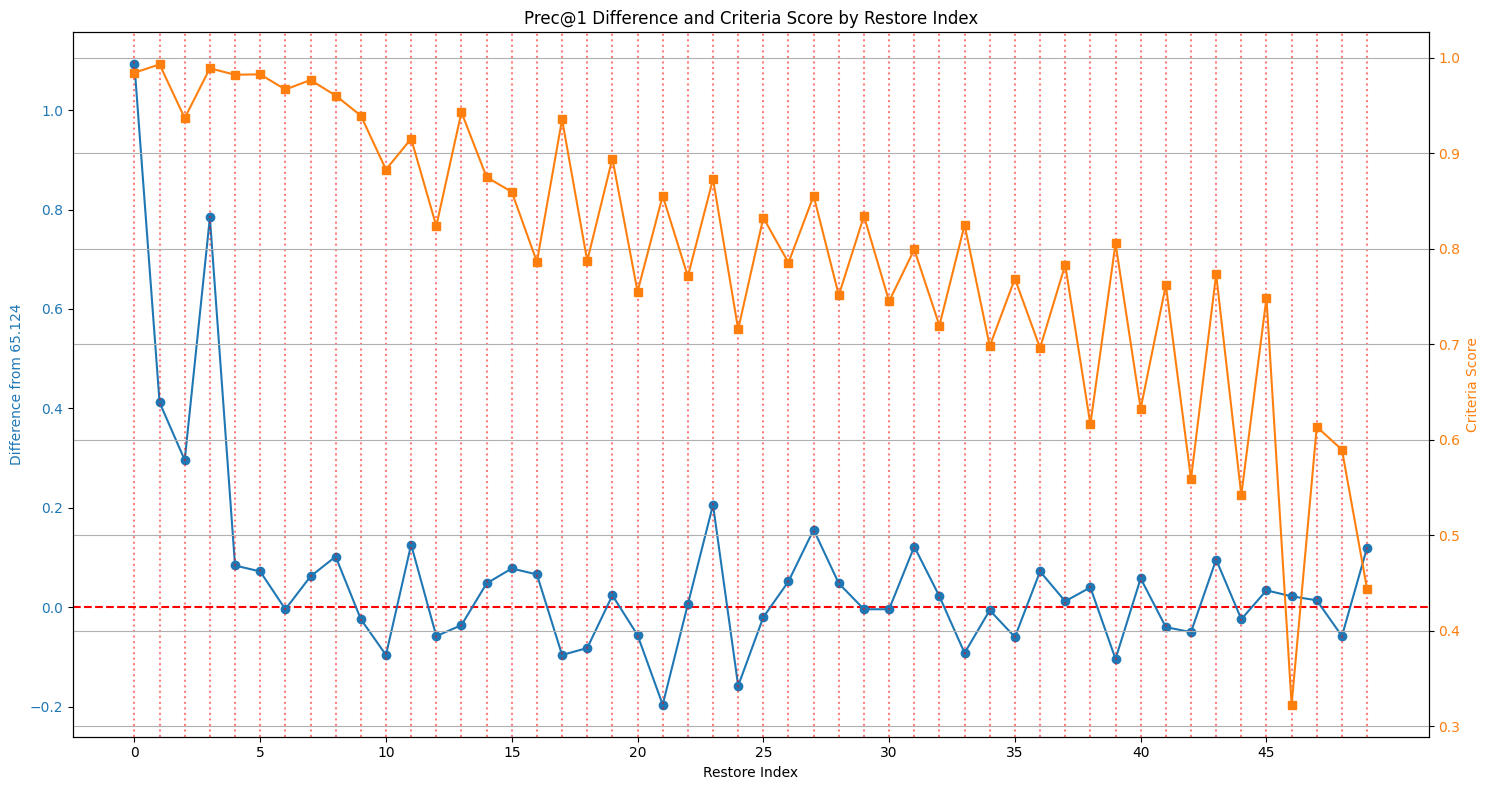

Correlation between Prec@1 difference and Criteria Score: 0.3258


In [3]:
import matplotlib.pyplot as plt
import re
import numpy as np

# (이전 코드는 동일하게 유지)

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(15, 8))  # 그래프 크기를 조금 더 크게 조정

# Prec@1 차이 그래프 (왼쪽 y축)
color = 'tab:blue'
ax1.set_xlabel('Restore Index')
ax1.set_ylabel('Difference from 65.124', color=color)
ax1.plot(indices, differences, color=color, marker='o', zorder=3)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=0, color='r', linestyle='--', zorder=2)

# Criteria Score 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Criteria Score', color=color)
ax2.plot(indices, criteria_scores, color=color, marker='s', zorder=3)
ax2.tick_params(axis='y', labelcolor=color)

# 각 Restore Index에 대한 수직선 추가
for idx in indices:
    plt.axvline(x=idx, color='red', linestyle=':', alpha=0.5, zorder=1)

plt.title('Prec@1 Difference and Criteria Score by Restore Index')
plt.grid(True, zorder=0)

# x축 눈금 설정
plt.xticks(range(0, max(indices)+1, 5))

plt.tight_layout()
plt.show()

# 상관관계 계산
correlation = np.corrcoef(differences, criteria_scores)[0, 1]
print(f"Correlation between Prec@1 difference and Criteria Score: {correlation:.4f}")

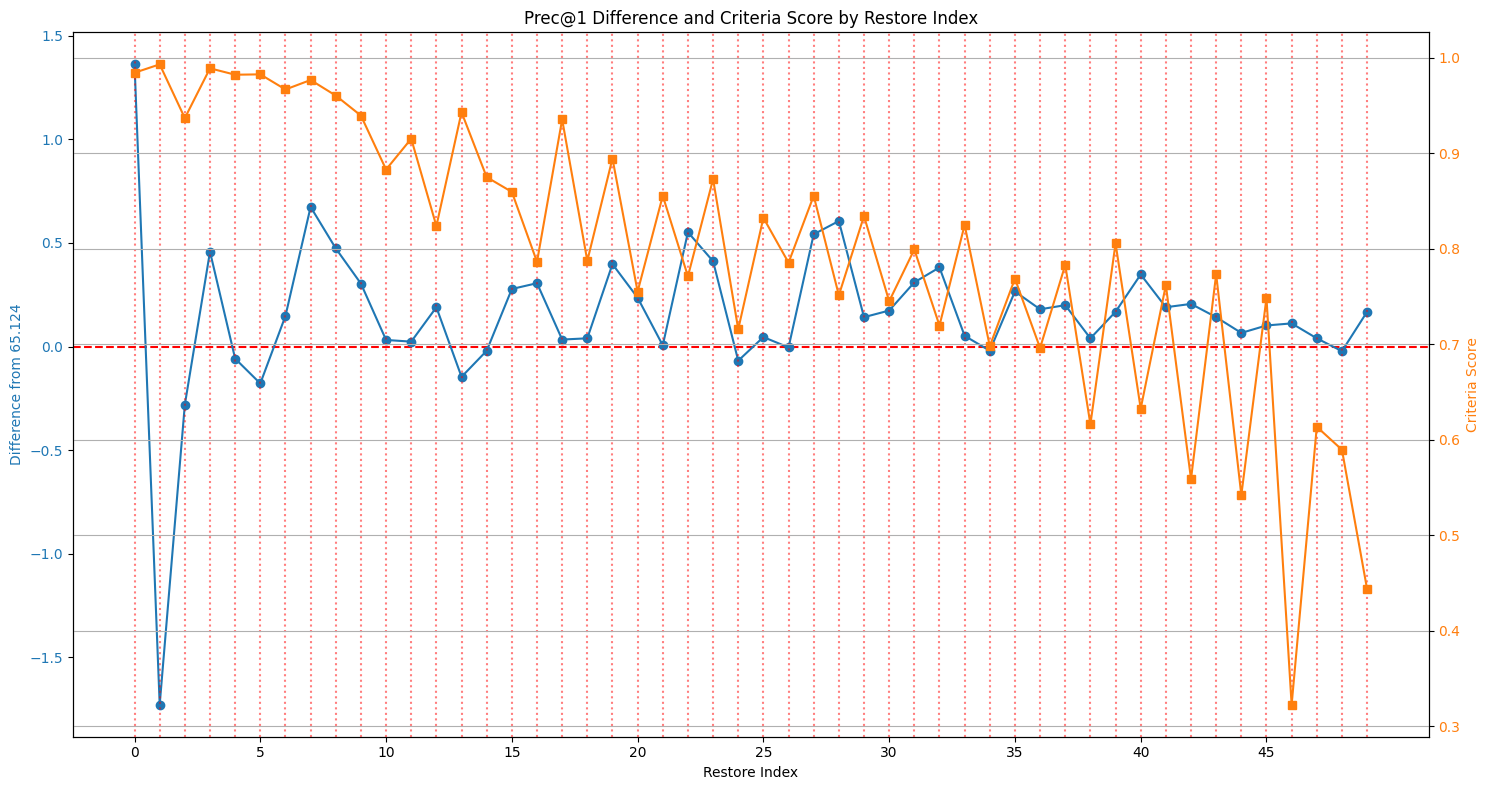

Correlation between Prec@1 difference and Criteria Score: -0.0259


In [4]:
import matplotlib.pyplot as plt
import re
import numpy as np

# 데이터 파싱 (기존 코드와 동일)
data = """
 * Restore Index: 0, Prec@1 58.024 Prec@5 81.190 Time 33.001
 * Restore Index: 1, Prec@1 54.934 Prec@5 78.820 Time 32.773
 * Restore Index: 2, Prec@1 56.382 Prec@5 80.028 Time 33.106
 * Restore Index: 3, Prec@1 57.120 Prec@5 80.220 Time 32.865
 * Restore Index: 4, Prec@1 56.604 Prec@5 80.094 Time 32.617
 * Restore Index: 5, Prec@1 56.484 Prec@5 80.224 Time 32.932
 * Restore Index: 6, Prec@1 56.810 Prec@5 80.266 Time 32.791
 * Restore Index: 7, Prec@1 57.336 Prec@5 80.794 Time 32.930
 * Restore Index: 8, Prec@1 57.136 Prec@5 80.546 Time 32.992
 * Restore Index: 9, Prec@1 56.966 Prec@5 80.206 Time 32.975
 * Restore Index: 10, Prec@1 56.694 Prec@5 80.134 Time 33.004
 * Restore Index: 11, Prec@1 56.686 Prec@5 80.122 Time 33.476
 * Restore Index: 12, Prec@1 56.852 Prec@5 80.324 Time 32.798
 * Restore Index: 13, Prec@1 56.516 Prec@5 80.082 Time 32.958
 * Restore Index: 14, Prec@1 56.642 Prec@5 80.250 Time 32.947
 * Restore Index: 15, Prec@1 56.940 Prec@5 80.350 Time 32.565
 * Restore Index: 16, Prec@1 56.968 Prec@5 80.098 Time 32.779
 * Restore Index: 17, Prec@1 56.696 Prec@5 80.292 Time 32.994
 * Restore Index: 18, Prec@1 56.702 Prec@5 80.178 Time 32.583
 * Restore Index: 19, Prec@1 57.060 Prec@5 80.442 Time 32.911
 * Restore Index: 20, Prec@1 56.898 Prec@5 80.320 Time 33.068
 * Restore Index: 21, Prec@1 56.668 Prec@5 79.908 Time 32.912
 * Restore Index: 22, Prec@1 57.214 Prec@5 80.452 Time 32.718
 * Restore Index: 23, Prec@1 57.074 Prec@5 80.402 Time 33.148
 * Restore Index: 24, Prec@1 56.594 Prec@5 80.168 Time 32.843
 * Restore Index: 25, Prec@1 56.708 Prec@5 80.246 Time 32.956
 * Restore Index: 26, Prec@1 56.658 Prec@5 80.088 Time 32.940
 * Restore Index: 27, Prec@1 57.204 Prec@5 80.388 Time 33.028
 * Restore Index: 28, Prec@1 57.268 Prec@5 80.768 Time 32.688
 * Restore Index: 29, Prec@1 56.804 Prec@5 80.184 Time 33.153
 * Restore Index: 30, Prec@1 56.836 Prec@5 80.206 Time 33.055
 * Restore Index: 31, Prec@1 56.972 Prec@5 80.324 Time 32.572
 * Restore Index: 32, Prec@1 57.044 Prec@5 80.160 Time 33.006
 * Restore Index: 33, Prec@1 56.714 Prec@5 80.126 Time 33.266
 * Restore Index: 34, Prec@1 56.642 Prec@5 80.066 Time 32.727
 * Restore Index: 35, Prec@1 56.928 Prec@5 80.224 Time 33.121
 * Restore Index: 36, Prec@1 56.842 Prec@5 80.214 Time 32.749
 * Restore Index: 37, Prec@1 56.862 Prec@5 80.120 Time 32.822
 * Restore Index: 38, Prec@1 56.702 Prec@5 80.222 Time 32.932
 * Restore Index: 39, Prec@1 56.830 Prec@5 80.220 Time 33.133
 * Restore Index: 40, Prec@1 57.010 Prec@5 80.322 Time 33.095
 * Restore Index: 41, Prec@1 56.852 Prec@5 80.256 Time 32.792
 * Restore Index: 42, Prec@1 56.868 Prec@5 80.076 Time 32.267
 * Restore Index: 43, Prec@1 56.804 Prec@5 80.204 Time 33.246
 * Restore Index: 44, Prec@1 56.728 Prec@5 80.114 Time 32.489
 * Restore Index: 45, Prec@1 56.764 Prec@5 80.294 Time 32.813
 * Restore Index: 46, Prec@1 56.774 Prec@5 80.246 Time 32.923
 * Restore Index: 47, Prec@1 56.702 Prec@5 80.162 Time 33.095
 * Restore Index: 48, Prec@1 56.640 Prec@5 80.140 Time 32.232
 * Restore Index: 49, Prec@1 56.830 Prec@5 80.314 Time 32.785
"""

# 정규 표현식을 사용하여 인덱스와 Prec@1 값 추출 (기존 코드와 동일)
pattern = r'Restore Index: (\d+), Prec@1 (\d+\.\d+)'
matches = re.findall(pattern, data)

# 데이터 준비 (기존 코드와 동일)
indices = [int(match[0]) for match in matches]
prec_values = [float(match[1]) for match in matches]

# 64.976을 기준으로 증감 계산 (기존 코드와 동일)
baseline = 56.662
differences = [val - baseline for val in prec_values]

# 새로운 criteria score 데이터
criteria_scores = [0.9844448, 0.9932241, 0.93696433, 0.9890642, 0.98236245, 0.98273927,
                   0.9669165, 0.97682315, 0.96053445, 0.93956995, 0.883112, 0.9153894,
                   0.82392144, 0.94314486, 0.87513494, 0.8596895, 0.78642637, 0.9355694,
                   0.78753734, 0.8946206, 0.75526136, 0.8556227, 0.7713002, 0.8730264,
                   0.7159015, 0.8325918, 0.7855737, 0.85561025, 0.7514658, 0.834453,
                   0.7451548, 0.79941905, 0.7197552, 0.82510316, 0.6981765, 0.76884013,
                   0.6962489, 0.783298, 0.6163095, 0.80576235, 0.63277966, 0.76214015,
                   0.5590432, 0.7734749, 0.5422483, 0.7486398, 0.32279363, 0.61376655,
                   0.58972996, 0.44388658]

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(15, 8))  # 그래프 크기를 조금 더 크게 조정

# Prec@1 차이 그래프 (왼쪽 y축)
color = 'tab:blue'
ax1.set_xlabel('Restore Index')
ax1.set_ylabel('Difference from 65.124', color=color)
ax1.plot(indices, differences, color=color, marker='o', zorder=3)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=0, color='r', linestyle='--', zorder=2)

# Criteria Score 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Criteria Score', color=color)
ax2.plot(indices, criteria_scores, color=color, marker='s', zorder=3)
ax2.tick_params(axis='y', labelcolor=color)

# 각 Restore Index에 대한 수직선 추가
for idx in indices:
    plt.axvline(x=idx, color='red', linestyle=':', alpha=0.5, zorder=1)

plt.title('Prec@1 Difference and Criteria Score by Restore Index')
plt.grid(True, zorder=0)

# x축 눈금 설정
plt.xticks(range(0, max(indices)+1, 5))

plt.tight_layout()
plt.show()

# 상관관계 계산
correlation = np.corrcoef(differences, criteria_scores)[0, 1]
print(f"Correlation between Prec@1 difference and Criteria Score: {correlation:.4f}")

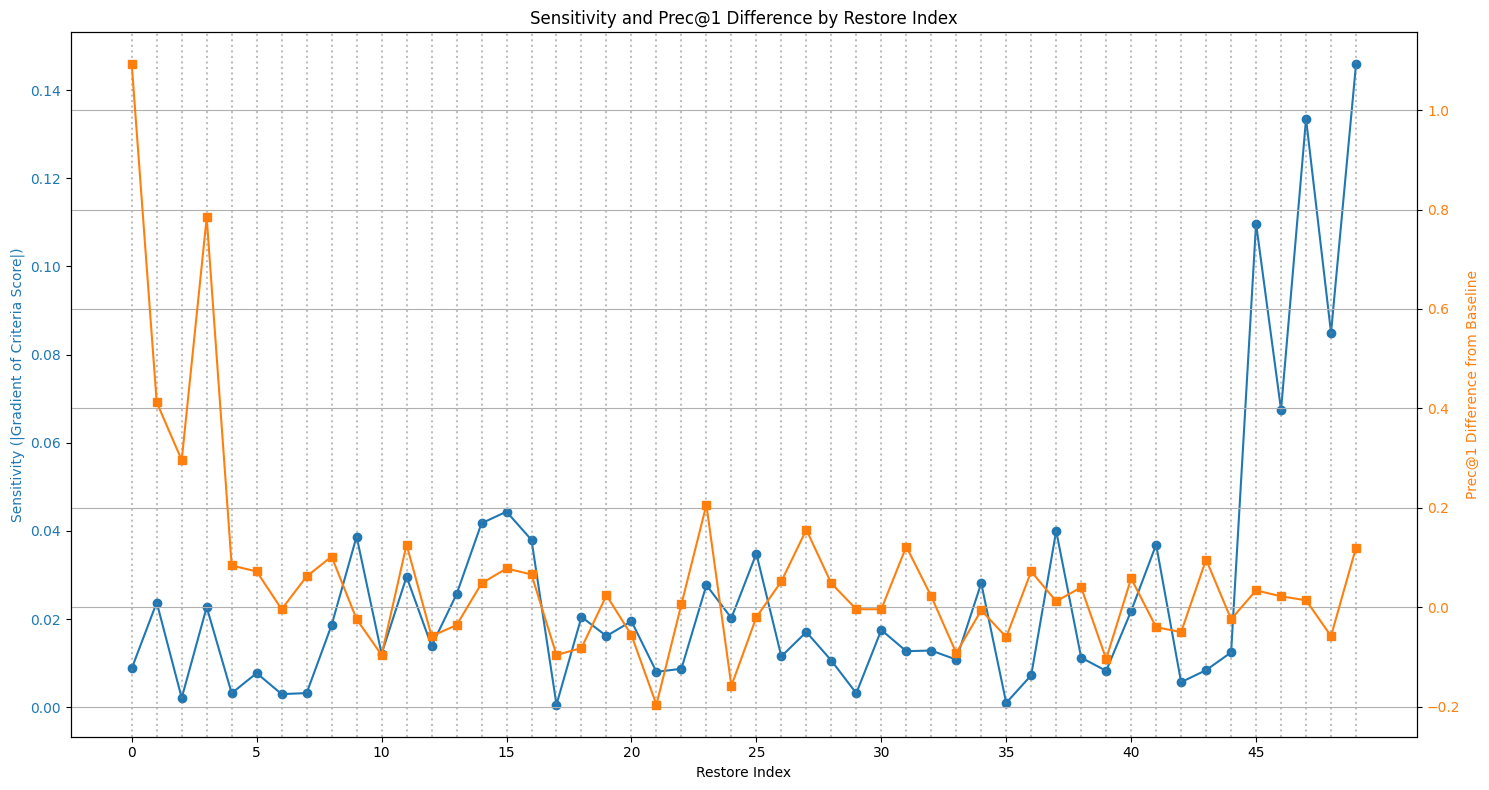

Correlation between Sensitivity and Prec@1 difference: -0.0284


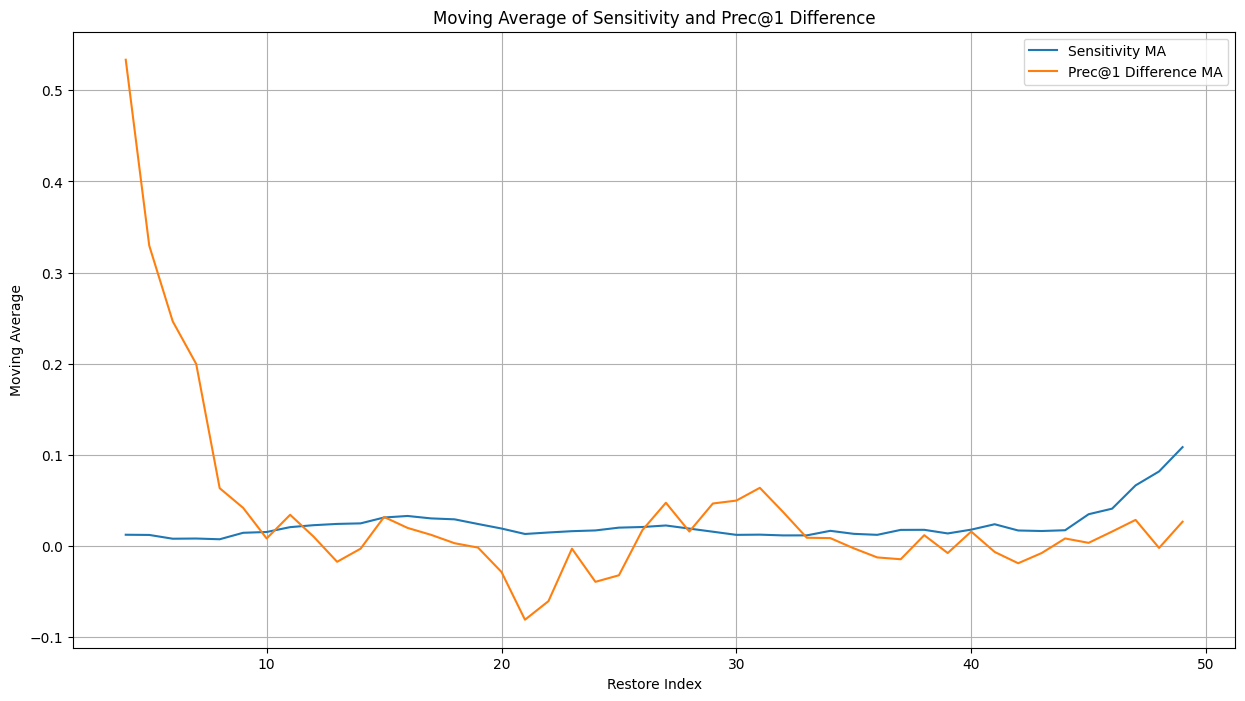

Correlation between Sensitivity MA and Prec@1 difference MA: -0.1557
Sensitivity peak indices: [ 1  3  5  9 11 15 18 20 23 25 27 30 32 34 37 41 45 47]
Prec@1 difference peak indices: []
Common peak indices: set()
Segment 1 correlation: 0.3851, p-value: 0.4509
Segment 2 correlation: 0.1343, p-value: 0.7997
Segment 3 correlation: 0.9670, p-value: 0.0016
Segment 4 correlation: 0.6840, p-value: 0.1340
Segment 5 correlation: -0.2378, p-value: 0.6500
Segment 6 correlation: 0.2404, p-value: 0.6464
Segment 7 correlation: -0.0841, p-value: 0.8741
Segment 8 correlation: 0.3483, p-value: 0.3979


/tmp/ipykernel_1160501/546915895.py:154: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  difference_peaks = np.where((differences[1:-1] > differences[:-2]) & (differences[1:-1] > differences[2:]))[0] + 1


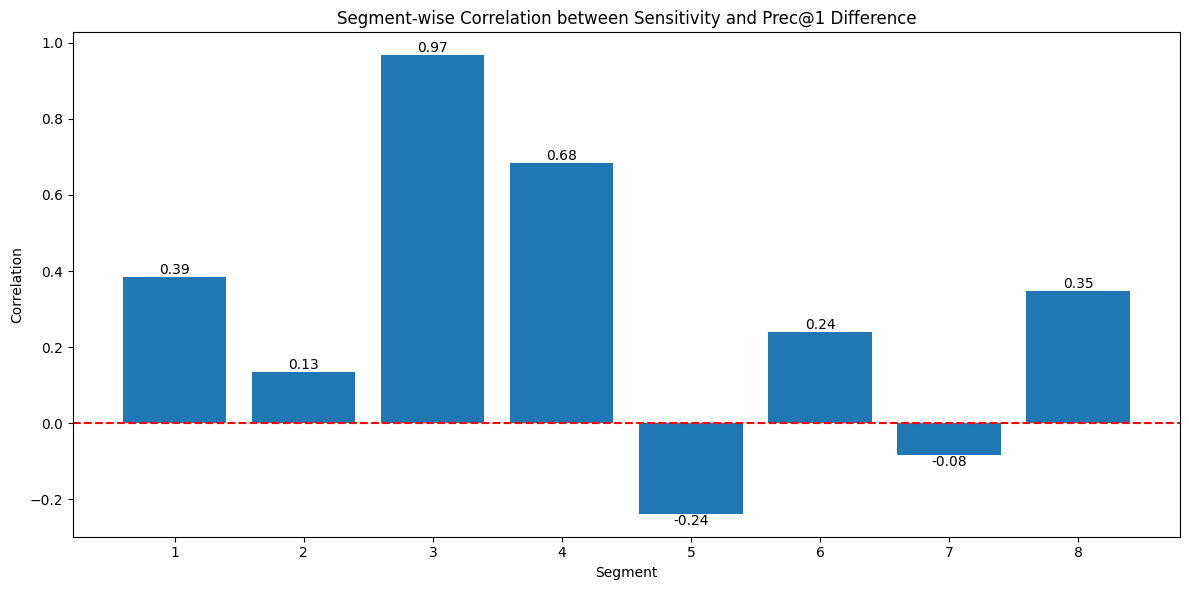

Overall correlation between Sensitivity and Prec@1 difference: -0.0284


In [12]:
import numpy as np
from scipy import stats


data = """
 * Restore Index: 0, Prec@1 66.216 Prec@5 87.610 Time 60.349
 * Restore Index: 1, Prec@1 65.536 Prec@5 86.860 Time 60.224
 * Restore Index: 2, Prec@1 65.420 Prec@5 86.826 Time 60.064
 * Restore Index: 3, Prec@1 65.908 Prec@5 87.216 Time 59.845
 * Restore Index: 4, Prec@1 65.208 Prec@5 86.874 Time 59.630
 * Restore Index: 5, Prec@1 65.196 Prec@5 86.712 Time 59.485
 * Restore Index: 6, Prec@1 65.120 Prec@5 86.664 Time 59.269
 * Restore Index: 7, Prec@1 65.186 Prec@5 86.776 Time 59.013
 * Restore Index: 8, Prec@1 65.226 Prec@5 86.678 Time 58.778
 * Restore Index: 9, Prec@1 65.100 Prec@5 86.698 Time 58.874
 * Restore Index: 10, Prec@1 65.028 Prec@5 86.638 Time 58.567
 * Restore Index: 11, Prec@1 65.250 Prec@5 86.706 Time 58.334
 * Restore Index: 12, Prec@1 65.066 Prec@5 86.744 Time 58.203
 * Restore Index: 13, Prec@1 65.088 Prec@5 86.696 Time 57.844
 * Restore Index: 14, Prec@1 65.172 Prec@5 86.650 Time 57.795
 * Restore Index: 15, Prec@1 65.202 Prec@5 86.844 Time 57.648
 * Restore Index: 16, Prec@1 65.190 Prec@5 86.758 Time 57.554
 * Restore Index: 17, Prec@1 65.028 Prec@5 86.708 Time 57.311
 * Restore Index: 18, Prec@1 65.042 Prec@5 86.600 Time 56.962
 * Restore Index: 19, Prec@1 65.148 Prec@5 86.802 Time 56.858
 * Restore Index: 20, Prec@1 65.068 Prec@5 86.692 Time 56.620
 * Restore Index: 21, Prec@1 64.928 Prec@5 86.710 Time 56.505
 * Restore Index: 22, Prec@1 65.130 Prec@5 86.738 Time 56.541
 * Restore Index: 23, Prec@1 65.330 Prec@5 86.876 Time 56.044
 * Restore Index: 24, Prec@1 64.966 Prec@5 86.668 Time 55.983
 * Restore Index: 25, Prec@1 65.104 Prec@5 86.664 Time 55.921
 * Restore Index: 26, Prec@1 65.176 Prec@5 86.648 Time 54.999
 * Restore Index: 27, Prec@1 65.280 Prec@5 86.750 Time 55.406
 * Restore Index: 28, Prec@1 65.172 Prec@5 86.718 Time 55.282
 * Restore Index: 29, Prec@1 65.120 Prec@5 86.754 Time 55.233
 * Restore Index: 30, Prec@1 65.120 Prec@5 86.660 Time 55.100
 * Restore Index: 31, Prec@1 65.246 Prec@5 86.736 Time 54.688
 * Restore Index: 32, Prec@1 65.146 Prec@5 86.744 Time 54.610
 * Restore Index: 33, Prec@1 65.032 Prec@5 86.736 Time 54.436
 * Restore Index: 34, Prec@1 65.118 Prec@5 86.710 Time 54.325
 * Restore Index: 35, Prec@1 65.064 Prec@5 86.708 Time 54.057
 * Restore Index: 36, Prec@1 65.196 Prec@5 86.642 Time 53.748
 * Restore Index: 37, Prec@1 65.136 Prec@5 86.694 Time 53.485
 * Restore Index: 38, Prec@1 65.164 Prec@5 86.628 Time 53.555
 * Restore Index: 39, Prec@1 65.020 Prec@5 86.682 Time 53.427
 * Restore Index: 40, Prec@1 65.182 Prec@5 86.718 Time 53.073
 * Restore Index: 41, Prec@1 65.084 Prec@5 86.706 Time 52.579
 * Restore Index: 42, Prec@1 65.074 Prec@5 86.676 Time 52.749
 * Restore Index: 43, Prec@1 65.220 Prec@5 86.780 Time 52.374
 * Restore Index: 44, Prec@1 65.100 Prec@5 86.728 Time 52.452
 * Restore Index: 45, Prec@1 65.158 Prec@5 86.720 Time 52.110
 * Restore Index: 46, Prec@1 65.146 Prec@5 86.712 Time 51.669
 * Restore Index: 47, Prec@1 65.138 Prec@5 86.712 Time 51.902
 * Restore Index: 48, Prec@1 65.066 Prec@5 86.684 Time 51.570
 * Restore Index: 49, Prec@1 65.244 Prec@5 86.834 Time 51.652
"""

# 정규 표현식을 사용하여 인덱스와 Prec@1 값 추출 (기존 코드와 동일)
pattern = r'Restore Index: (\d+), Prec@1 (\d+\.\d+)'
matches = re.findall(pattern, data)

# 데이터 준비 (기존 코드와 동일)
indices = [int(match[0]) for match in matches]
prec_values = [float(match[1]) for match in matches]

# 64.976을 기준으로 증감 계산 (기존 코드와 동일)
baseline = 65.124
# differences = [val - baseline for val in prec_values]
differences = [val - baseline for val in prec_values]

# 새로운 criteria score 데이터
criteria_scores = [0.9844448, 0.9932241, 0.93696433, 0.9890642, 0.98236245, 0.98273927,
                   0.9669165, 0.97682315, 0.96053445, 0.93956995, 0.883112, 0.9153894,
                   0.82392144, 0.94314486, 0.87513494, 0.8596895, 0.78642637, 0.9355694,
                   0.78753734, 0.8946206, 0.75526136, 0.8556227, 0.7713002, 0.8730264,
                   0.7159015, 0.8325918, 0.7855737, 0.85561025, 0.7514658, 0.834453,
                   0.7451548, 0.79941905, 0.7197552, 0.82510316, 0.6981765, 0.76884013,
                   0.6962489, 0.783298, 0.6163095, 0.80576235, 0.63277966, 0.76214015,
                   0.5590432, 0.7734749, 0.5422483, 0.7486398, 0.32279363, 0.61376655,
                   0.58972996, 0.44388658]
import numpy as np
import matplotlib.pyplot as plt

# (이전 코드는 그대로 유지)

import numpy as np
import matplotlib.pyplot as plt

# (이전 코드는 그대로 유지)

# Criteria Score의 기울기 계산
criteria_gradient = np.gradient(criteria_scores)

# 기울기의 절대값을 사용하여 민감도 계산
# sensitivity = criteria_gradient
sensitivity = np.abs(criteria_gradient)

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(15, 8))

# 민감도 그래프 (왼쪽 y축)
color = 'tab:blue'
ax1.set_xlabel('Restore Index')
ax1.set_ylabel('Sensitivity (|Gradient of Criteria Score|)', color=color)
ax1.plot(indices, sensitivity, color=color, marker='o', zorder=3)
ax1.tick_params(axis='y', labelcolor=color)

# Prec@1 차이 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Prec@1 Difference from Baseline', color=color)
ax2.plot(indices, differences, color=color, marker='s', zorder=3)
ax2.tick_params(axis='y', labelcolor=color)

# 각 Restore Index에 대한 수직선 추가
for idx in indices:
    plt.axvline(x=idx, color='gray', linestyle=':', alpha=0.5, zorder=1)

plt.title('Sensitivity and Prec@1 Difference by Restore Index')
plt.grid(True, zorder=0)

# x축 눈금 설정
plt.xticks(range(0, max(indices)+1, 5))

plt.tight_layout()
plt.show()

# 상관관계 계산
correlation = np.corrcoef(sensitivity, differences)[0, 1]
print(f"Correlation between Sensitivity and Prec@1 difference: {correlation:.4f}")

# 추가 분석: 이동 평균
window_size = 5
sensitivity_ma = np.convolve(sensitivity, np.ones(window_size), 'valid') / window_size
differences_ma = np.convolve(differences, np.ones(window_size), 'valid') / window_size

# 이동 평균 그래프
plt.figure(figsize=(15, 8))
plt.plot(range(window_size-1, len(sensitivity)), sensitivity_ma, label='Sensitivity MA')
plt.plot(range(window_size-1, len(differences)), differences_ma, label='Prec@1 Difference MA')
plt.xlabel('Restore Index')
plt.ylabel('Moving Average')
plt.title('Moving Average of Sensitivity and Prec@1 Difference')
plt.legend()
plt.grid(True)
plt.show()

# 이동 평균 상관관계
ma_correlation = np.corrcoef(sensitivity_ma, differences_ma)[0, 1]
print(f"Correlation between Sensitivity MA and Prec@1 difference MA: {ma_correlation:.4f}")

# 극값 분석
sensitivity_peaks = np.where((sensitivity[1:-1] > sensitivity[:-2]) & (sensitivity[1:-1] > sensitivity[2:]))[0] + 1
difference_peaks = np.where((differences[1:-1] > differences[:-2]) & (differences[1:-1] > differences[2:]))[0] + 1

print("Sensitivity peak indices:", sensitivity_peaks)
print("Prec@1 difference peak indices:", difference_peaks)
print("Common peak indices:", set(sensitivity_peaks) & set(difference_peaks))

# 구간별 상관 계수 계산 함수
def segment_correlation(x, y, segments=5):
    segment_size = len(x) // segments
    correlations = []
    p_values = []
    for i in range(segments):
        start = i * segment_size
        end = (i + 1) * segment_size if i < segments - 1 else len(x)
        corr, p_value = stats.pearsonr(x[start:end], y[start:end])
        correlations.append(corr)
        p_values.append(p_value)
    return correlations, p_values

# 구간별 상관관계 계산
num_segments = 8
segment_corrs, segment_p_values = segment_correlation(sensitivity, differences, num_segments)

# 구간별 상관관계 출력
for i, (corr, p_value) in enumerate(zip(segment_corrs, segment_p_values)):
    print(f"Segment {i+1} correlation: {corr:.4f}, p-value: {p_value:.4f}")

# 구간별 상관관계 시각화
plt.figure(figsize=(12, 6))
plt.bar(range(1, num_segments+1), segment_corrs)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Segment')
plt.ylabel('Correlation')
plt.title('Segment-wise Correlation between Sensitivity and Prec@1 Difference')
plt.xticks(range(1, num_segments+1))
for i, corr in enumerate(segment_corrs):
    plt.text(i+1, corr, f'{corr:.2f}', ha='center', va='bottom' if corr >= 0 else 'top')
plt.tight_layout()
plt.show()

# 전체 상관관계 계산 (이전과 동일)
correlation = np.corrcoef(sensitivity, differences)[0, 1]
print(f"Overall correlation between Sensitivity and Prec@1 difference: {correlation:.4f}")
